<h1><center> Klasifikator </center></h1>

 <center>
    <h1><center>Microsoft malware classification</center></h1>
    <i>Klasifikacija zlonamjernog softvera</i> 
    <br><br>
    PRIRODOSLOVNO MATEMATIČKI FAKULTET - MATEMATIČKI ODSJEK <br>
    <b>Lipanj 2020.</b> 
    <br><br>
    <i>Stanišić Matea, Škrabo Petra, Terzanović Mateja, Tolja Margarita</i>  
</center>

***

Potrebno je u anaconda prompt-u instalirati xgboost s:<br>
<code>conda install -c anaconda py-xgboost</code>

### Priprema

In [1]:
# potrebni paketi
import numpy as np
from numpy import mean
from numpy import std
from numpy import loadtxt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import pyplot
from IPython.core.pylabtools import figsize
from collections import Counter
import random

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, log_loss, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold, StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import class_weight

In [71]:
# učitavanje svih značajki iz training skupa
features = pd.read_csv("https://raw.githubusercontent.com/mateastanisic/lfs/master/merged_all_features.csv")

In [ ]:
# učitavanje svih značajki iz testing skupa
#features_test = pd.read_csv("https://raw.githubusercontent.com/mateastanisic/lfs/master/merged_test_features.csv")

In [74]:
# učitavanje svih značajki iz training skupa
#selected_features = pd.read_csv('feature_selection_cv5')
#selected_features = pd.read_csv('selected_features_pca_train_cv2.csv')
selected_features = pd.read_csv('selected_features_rfc_train_cv2.csv')

In [4]:
features.head()

,Id,Class,byte_1G_00,byte_1G_01,byte_1G_02,byte_1G_03,byte_1G_04,byte_1G_05,byte_1G_06,byte_1G_07,...,visualc,___security_cookie,assume,callvirtualalloc,exportedentry,hardware,hkey_current_user,hkey_local_machine,sp-analysisfailed,unableto
0,01kcPWA9K2BOxQeS5Rju,1,21091,1213,726,817,1257,625,550,523,...,0,0,0,0,0,0,0,0,0,0
1,04EjIdbPV5e1XroFOpiN,1,40030,1980,1226,1193,1971,1096,961,755,...,0,0,0,0,0,0,0,0,0,0
2,05EeG39MTRrI6VY21DPd,1,19419,955,693,656,832,463,370,510,...,0,0,0,0,0,0,0,0,0,0
3,05rJTUWYAKNegBk2wE8X,1,79568,6445,3143,2517,4982,1824,2125,2964,...,0,0,2,0,0,0,0,0,0,0
4,0AnoOZDNbPXIr2MRBSCJ,1,25791,1202,569,750,948,456,405,517,...,0,0,0,0,0,0,0,0,0,0


In [5]:
selected_features.head()

,Unnamed: 0,assume,_acmdln,asm_md_filesize,asm_md_loc,asm_opcodes_call,asm_opcodes_cmp,asm_opcodes_db,asm_opcodes_endp,asm_opcodes_jmp,...,byte_1G_cf,ent_q_diffs_14,byte_1G_dc,byte_1G_9a,asm_opcodes_shr,byte_1G_96,byte_1G_ef,byte_1G_06,byte_1G_d7,byte_1G_8e
0,0,0,0,14726,1276,53,15,139,14,12,...,344,0.013045,522,331,0,375,340,550,403,342
1,1,0,0,606128,64610,2900,1585,4154,732,1434,...,427,0.063953,421,314,44,267,359,961,307,383
2,2,0,0,133226,15897,461,320,2949,235,145,...,601,0.045263,328,206,7,182,394,370,481,226
3,3,2,0,1906854,231388,10686,7071,20682,2214,4605,...,1020,0.007357,1385,670,375,730,1243,2125,1150,988
4,4,0,0,131451,16827,462,539,3276,98,240,...,384,0.021719,293,255,69,240,310,405,310,298


In [6]:
#razdvajanje kategorija značajki
one_gram_features = features.iloc[:,2:258]
metadata_bytes_features = features.iloc[:,258:260]
entropy_features = features.iloc[:,260:462]
image_features = features.iloc[:,462:514]
string_length_features = features.iloc[:,514:630]
metadata_asm_features = features.iloc[:,630:632]
symbols_features = features.iloc[:,632:639]
opcode_features = features.iloc[:,639:732]
reg_features = features.iloc[:,732:758]
section_features = features.iloc[:,758:782]
dd_features = features.iloc[:,782:806]
api_features = features.iloc[:,806:1600]
key_features = features.iloc[:,1600:1695]

In [7]:
#postavljanje seed-a za podjelu podataka na train i test
seed = 42

In [28]:
X=selected_features.iloc[:,1:187]
y=features.iloc[:,1]

### random forest



In [ ]:
def random_forest(X_train, X_test, y_train):
    clf = RandomForestClassifier(n_estimators=50)
    clf.fit(X_train, y_train)
    pred_class = clf.predict(X_test)
    pred_prob = clf.predict_proba(X_test)
    
    return pred_class,pred_prob
    

### extra tree

In [ ]:
def extra_tree(X_train, X_test, y_train):
    clf = ExtraTreesClassifier(n_estimators=50)
    param_grid = {
        'n_estimators': [200, 700],
        'max_features': ['auto', 'sqrt', 'log2']
    }
    clf.fit(X_train, y_train)
    pred_class = clf.predict(X_test)
    pred_prob = clf.predict_proba(X_test)
    
    return pred_class,pred_prob

### XGBClassifier

In [13]:
#početni parametri za XGBClassifier
params = {}
params['n_estimators'] = 50
params['learning_rate'] = 0.5
params['max_depth'] = 5
params['colsample_bytree'] = 0.5
params['objective'] = 'multi:softprob'
params['eval_metric'] = 'mlogloss'

In [14]:
def xgboost_basic_cl(X_train, X_test, y_train):
    
    y_train = [int(x-1) for x in y_train]
    exgb_classifier = xgb.XGBClassifier()
    exgb_classifier.set_params(**params)
    exgb_classifier.fit(X_train, y_train)
    
    preds = exgb_classifier.predict_proba(X_test)
    best_preds = exgb_classifier.predict(X_test)
    return best_preds, preds

In [15]:
def xgboost_weighted_cl(X_train, X_test, y_train):
    class_weights = list(class_weight.compute_class_weight('balanced', np.unique(features['Class']),features['Class']))
    w_array = np.ones(y_train.shape[0], dtype = 'float')
    for i, val in enumerate(y_train):
        w_array[i] = class_weights[val-1]
      
    y_train = [int(x-1) for x in y_train]
    
    exgb_classifier = xgb.XGBClassifier()
    exgb_classifier.set_params(**params)
    exgb_classifier.fit(X_train, y_train, sample_weight=w_array)

    preds = exgb_classifier.predict_proba(X_test)
    best_preds = exgb_classifier.predict(X_test)
    return best_preds, preds

###  confusion matrix

In [16]:
#funkcija koja računa i crta matricu konfuzije
def make_and_plot_confusion_matrix(y_test, best_preds):
    names = ['class 1', 'class 2','class 3', 'class 4', 'class 5','class 6', 'class 7', 'class 8', 'class 9']
    cm = confusion_matrix(y_test, best_preds)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    norm_conf = []
    for i in cm:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)

    fig = plt.figure(figsize(10, 10))
    plt.clf()
    ax = fig.add_subplot(111)
    ax.set_aspect(1)
    
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Blues, interpolation='nearest')

    width = len(cm)
    height = len(cm[0])

    for x in range(width):
        for y in range(height):
            ax.annotate(str(format(round(cm[x][y], 2))), xy=(y, x), horizontalalignment='center', verticalalignment='center')
    plt.title('Confusion matrix')
    cb = fig.colorbar(res)
    plt.xticks(range(width), names)
    plt.yticks(range(height), names)

### iteracije

In [187]:
#promatramo što se događa kako raste broj iteracija
X_train, X_test, y_train, y_test = train_test_split( X, features['Class'], test_size=0.3, random_state=47)
y_train = [int(x-1) for x in y_train]
y_test = [int(x-1) for x in y_test]

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
watchlist = [(dtrain, 'train'), (dtest, 'eval')]
results=dict()
evals = (dtest,y_test)
bst = xgb.train(param, dtrain, 300, early_stopping_rounds=20, evals=watchlist, evals_result=results, verbose_eval=True)


[0]	train-merror:0.091244	train-mlogloss:1.25458	eval-merror:0.099663	eval-mlogloss:1.2587
Multiple eval metrics have been passed: 'eval-mlogloss' will be used for early stopping.

Will train until eval-mlogloss hasn't improved in 20 rounds.
[1]	train-merror:0.064686	train-mlogloss:0.942098	eval-merror:0.073597	eval-mlogloss:0.952889
[2]	train-merror:0.046148	train-mlogloss:0.725049	eval-merror:0.058571	eval-mlogloss:0.741228
[3]	train-merror:0.039705	train-mlogloss:0.571801	eval-merror:0.051211	eval-mlogloss:0.590367
[4]	train-merror:0.037733	train-mlogloss:0.467121	eval-merror:0.048145	eval-mlogloss:0.488904
[5]	train-merror:0.031554	train-mlogloss:0.380244	eval-merror:0.041705	eval-mlogloss:0.405489
[6]	train-merror:0.029056	train-mlogloss:0.315508	eval-merror:0.038332	eval-mlogloss:0.343099
[7]	train-merror:0.028267	train-mlogloss:0.267502	eval-merror:0.036799	eval-mlogloss:0.296315
[8]	train-merror:0.025901	train-mlogloss:0.230397	eval-merror:0.035572	eval-mlogloss:0.261521
[9]	tr

[89]	train-merror:0	train-mlogloss:0.001466	eval-merror:0.013799	eval-mlogloss:0.043592
[90]	train-merror:0	train-mlogloss:0.00144	eval-merror:0.013799	eval-mlogloss:0.043678
[91]	train-merror:0	train-mlogloss:0.001414	eval-merror:0.013799	eval-mlogloss:0.043779
[92]	train-merror:0	train-mlogloss:0.001388	eval-merror:0.013799	eval-mlogloss:0.043684
[93]	train-merror:0	train-mlogloss:0.001365	eval-merror:0.013799	eval-mlogloss:0.043754
[94]	train-merror:0	train-mlogloss:0.001342	eval-merror:0.014106	eval-mlogloss:0.043836
[95]	train-merror:0	train-mlogloss:0.001322	eval-merror:0.014106	eval-mlogloss:0.043903
[96]	train-merror:0	train-mlogloss:0.001299	eval-merror:0.013799	eval-mlogloss:0.043969
[97]	train-merror:0	train-mlogloss:0.001283	eval-merror:0.013799	eval-mlogloss:0.043956
[98]	train-merror:0	train-mlogloss:0.001263	eval-merror:0.013799	eval-mlogloss:0.043815
[99]	train-merror:0	train-mlogloss:0.00124	eval-merror:0.013799	eval-mlogloss:0.043634
[100]	train-merror:0	train-mloglos

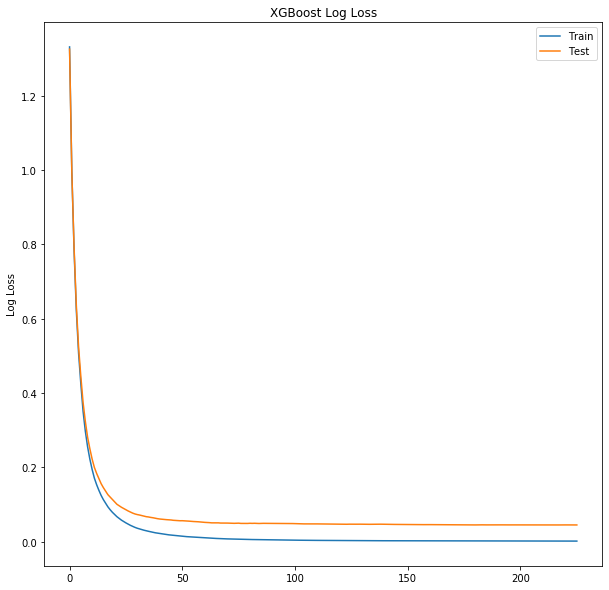

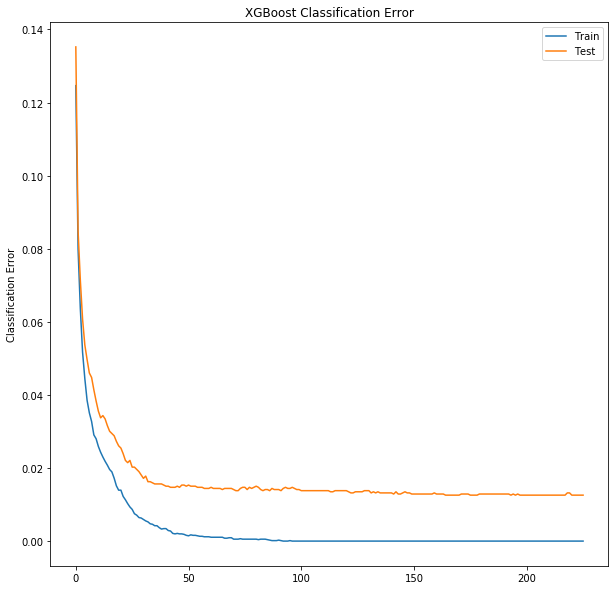

In [154]:
epochs = len(results['train']['merror'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['train']['mlogloss'], label='Train')
ax.plot(x_axis, results['eval']['mlogloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['train']['merror'], label='Train')
ax.plot(x_axis, results['eval']['merror'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

### iteracije za XGBClassifier

In [29]:
X_train, X_test, y_train, y_test = train_test_split( X, features['Class'], test_size=0.3, random_state=47)
eval_set = [(X_train, y_train), (X_test, y_test)]

model = xgb.XGBClassifier()
params['n_estimators'] = 300
model.set_params(**params)
model.fit(X_train, y_train, early_stopping_rounds=15, eval_metric=["merror", "mlogloss"], eval_set=eval_set, verbose=True)



[0]	validation_0-merror:0.017355	validation_0-mlogloss:0.567808	validation_1-merror:0.024532	validation_1-mlogloss:0.585672
Multiple eval metrics have been passed: 'validation_1-mlogloss' will be used for early stopping.

Will train until validation_1-mlogloss hasn't improved in 15 rounds.
[1]	validation_0-merror:0.006705	validation_0-mlogloss:0.334902	validation_1-merror:0.01196	validation_1-mlogloss:0.355346
[2]	validation_0-merror:0.004865	validation_0-mlogloss:0.2052	validation_1-merror:0.010426	validation_1-mlogloss:0.227883
[3]	validation_0-merror:0.003024	validation_0-mlogloss:0.128997	validation_1-merror:0.0092	validation_1-mlogloss:0.151882
[4]	validation_0-merror:0.001972	validation_0-mlogloss:0.081279	validation_1-merror:0.008893	validation_1-mlogloss:0.104902
[5]	validation_0-merror:0.001183	validation_0-mlogloss:0.051999	validation_1-merror:0.009506	validation_1-mlogloss:0.076436
[6]	validation_0-merror:0.000789	validation_0-mlogloss:0.033536	validation_1-merror:0.00828	va

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

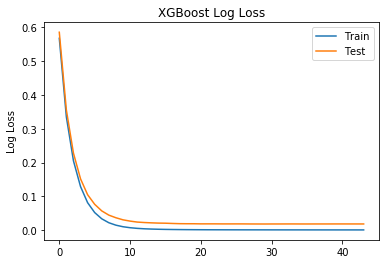

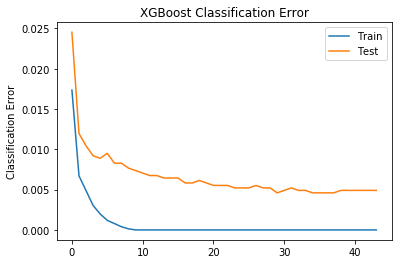

In [30]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()
# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [31]:
params['n_estimators'] = 29

Mislim da sada stvarno mogu zaključiti da su gornja dva pristupa jednaka. Mnogo puta su mi ispadali dosta drugačiji rezultati,
ali sam zaključila da te to zbog razlike u parametrima. Neki se drugačije zovu, neki se koriste skroz drugačije. Za sada nek 
stoje oba pristupa pa ćemo vidjeti koji je najzgodniji za korištenje na kraju. Ne znam više gdje se labele trebaju smanjit 
za 1, a gdje ne. Isprike što nisam konzistentna.

### testiranje parametara

In [34]:
model_XGB = xgb.XGBClassifier(n_estimators =29, objective= 'multi:softprob')

In [35]:
max_depth_range = list(range(3,10))

learning_rate_range = list(range(1, 5))
learning_rate_range = [x / 10 for x in learning_rate_range]
#learning_rate_range.append(0.01)

colsample_bytree_range = list(range(5, 10))
colsample_bytree_range = [x / 10 for x in colsample_bytree_range]

#gamma_range = list()
#gamma_range.append(0)
#gamma_range.append(1)
#gamma_range.append(5)

param_ranges = dict(learning_rate = learning_rate_range,
                      max_depth=max_depth_range,
                     colsample_bytree=colsample_bytree_range)

In [36]:
# koristimo RandomizedSearchCV za testiranje parametara
rand_search = RandomizedSearchCV(model_XGB, param_ranges, cv=10, scoring='accuracy', n_iter=20, random_state=5, return_train_score=False)
rand_search.fit(X, y)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=29,
                                           n_jobs=1, nthread=None,
                                           objective='multi:softprob',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='dep

In [37]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(rand_search.cv_results_)[['mean_test_score', 'params']]


,mean_test_score,params
0,0.995767,"{'max_depth': 4, 'learning_rate': 0.3, 'colsample_bytree': 0.6}"
1,0.994663,"{'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.7}"
2,0.995583,"{'max_depth': 9, 'learning_rate': 0.3, 'colsample_bytree': 0.6}"
3,0.994203,"{'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.9}"
4,0.996043,"{'max_depth': 8, 'learning_rate': 0.4, 'colsample_bytree': 0.6}"
5,0.995767,"{'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 0.7}"
6,0.995767,"{'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 0.8}"
7,0.995951,"{'max_depth': 5, 'learning_rate': 0.4, 'colsample_bytree': 0.5}"
8,0.994755,"{'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.8}"
9,0.995859,"{'max_depth': 7, 'learning_rate': 0.4, 'colsample_bytree': 0.5}"


In [38]:
# dohvaćanje najboljih parametara
print(rand_search.best_score_)
print(rand_search.best_params_)
param3=rand_search.best_params_
param3['n_estimators'] = 50 
param3['objective'] = 'multi:softprob'

0.996319130660188
{'max_depth': 4, 'learning_rate': 0.4, 'colsample_bytree': 0.6}


### isto samo s neg_log_loss

In [40]:
# koristimo RandomizedSearchCV za testiranje parametara
# neg_log_los je bolji što je veći(suprotno od logloss). Ovdje se ne može koristiti logloss
rand_search = RandomizedSearchCV(model_XGB, param_ranges, cv=5, scoring='neg_log_loss', n_iter=20, random_state=5, return_train_score=False)
rand_search.fit(X, y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=29,
                                           n_jobs=1, nthread=None,
                                           objective='multi:softprob',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='depr

In [41]:
pd.set_option('display.max_colwidth', None)
pd.DataFrame(rand_search.cv_results_)[['mean_test_score', 'params']]


,mean_test_score,params
0,-0.016356,"{'max_depth': 4, 'learning_rate': 0.3, 'colsample_bytree': 0.6}"
1,-0.106314,"{'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.7}"
2,-0.016813,"{'max_depth': 9, 'learning_rate': 0.3, 'colsample_bytree': 0.6}"
3,-0.108095,"{'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.9}"
4,-0.015279,"{'max_depth': 8, 'learning_rate': 0.4, 'colsample_bytree': 0.6}"
5,-0.023353,"{'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 0.7}"
6,-0.023798,"{'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 0.8}"
7,-0.015653,"{'max_depth': 5, 'learning_rate': 0.4, 'colsample_bytree': 0.5}"
8,-0.106519,"{'max_depth': 8, 'learning_rate': 0.1, 'colsample_bytree': 0.8}"
9,-0.015661,"{'max_depth': 7, 'learning_rate': 0.4, 'colsample_bytree': 0.5}"


In [46]:
# dohvaćanje najboljih parametara
print(rand_search.best_score_)
print(rand_search.best_params_)
param4=rand_search.best_params_
param4['n_estimators'] = 29 
param4['objective'] = 'multi:softprob'

-0.014560415009167601
{'max_depth': 4, 'learning_rate': 0.4, 'colsample_bytree': 0.6, 'n_estimators': 29, 'objective': 'multi:softprob'}


Dobili smo jednak rezultat za accuracy i za logloss tako da ćemo uzeti te parametre

In [47]:
params=param4
params

{'max_depth': 4,
 'learning_rate': 0.4,
 'colsample_bytree': 0.6,
 'n_estimators': 29,
 'objective': 'multi:softprob'}

<br>
<br>

# XGboost proveden na svim značajkama

Logloss:0.01836673800688013
Accuracy:0.9954001839926403


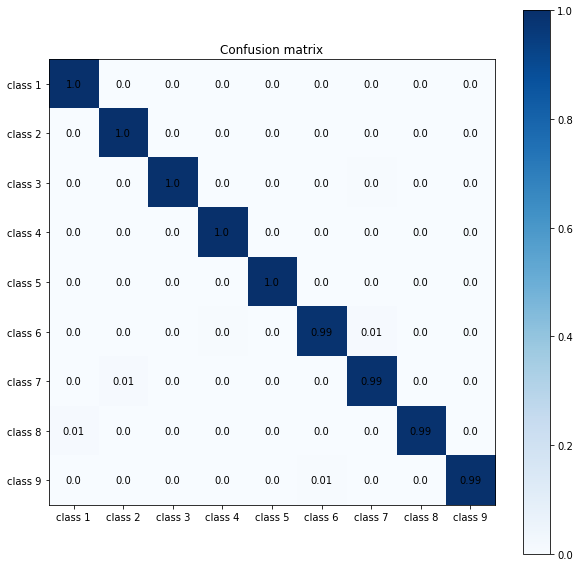

In [48]:
#xgboost na svim značajkama

#ovakav postupak se ponavlja puno puta pa je ovdje detaljnije komentiran
#prvo definiramo što nam je dataset i onda ga podijelimo na train i test
X_all=features.iloc[:,2:1695]
X_train, X_test, y_train, y_test = train_test_split( X_all, features['Class'], test_size=0.3, random_state=seed)
#pozovemo funkciju koja nam vrati predictions, pred[0]=klasa, pred[1]=vjerojatnosti
pred = xgboost_basic_cl(X_train, X_test, y_train)
#trebamo shift-ati klase i u y_test
y_test = [int(x-1) for x in y_test]
#računamo logloss(on uzima vjerojatnosti) i točnost(uzima klase)
score_log = log_loss(y_test,pred[1],eps=1e-15)
score_acc = accuracy_score(y_test, pred[0])
print('Logloss:' + str(score_log))
print('Accuracy:' + str(score_acc))
#matrici konfuzije šaljemo prave i predviđene klase skupa za testiranje
make_and_plot_confusion_matrix(y_test,pred[0])

In [49]:
def pomocna_fja(data):
    X_train, X_test, y_train, y_test = train_test_split( data, features['Class'], test_size=0.3, random_state=seed)
    pred = xgboost_basic_cl(X_train, X_test, y_train)
    y_test = [int(x-1) for x in y_test]
    score_log = log_loss(y_test,pred[1],eps=1e-15)
    score_acc = accuracy_score(y_test, pred[0])
    sve.append((score_log,score_acc))
    cm = confusion_matrix(y_test, pred[0])
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_diagonal.append(cm.diagonal())

In [50]:
#xgboost na svakoj kategoriji značajki posebno (samo informativno)
sve = []
cm_diagonal =[]

pomocna_fja(one_gram_features)
pomocna_fja(metadata_bytes_features)
pomocna_fja(entropy_features)
pomocna_fja(image_features)
pomocna_fja(string_length_features)
pomocna_fja(metadata_asm_features)
pomocna_fja(symbols_features)
pomocna_fja(opcode_features)
pomocna_fja(reg_features)
pomocna_fja(section_features)
pomocna_fja(dd_features)
pomocna_fja(api_features)
pomocna_fja(key_features)

In [51]:
#tablica rezultata
pd.DataFrame(sve, columns=['log_loss','accuracy_score'])

,log_loss,accuracy_score
0,0.058458,0.982827
1,0.506387,0.830420
2,0.048115,0.987734
3,0.119277,0.966575
4,0.079762,0.975468
5,0.513223,0.834713
6,0.145524,0.961668
7,0.042271,0.989574
8,0.090743,0.974854
9,1.927036,0.257590


In [52]:
#dijagonale pripadnih matrica konfizije
#iz toga možemo vidjeti točnost po klasama za svaku kategoriju feature-a
for list1 in cm_diagonal:
    for element in list1:
        print(str(format(round(element, 2))), end ="\t")
    print('')

0.98	0.99	1.0	1.0	0.92	0.96	0.95	0.94	0.99	
0.82	0.8	0.98	0.91	0.08	0.55	0.69	0.8	0.76	
0.99	1.0	1.0	0.99	0.83	0.98	0.98	0.95	0.99	
0.95	0.99	0.99	0.97	0.58	0.89	0.97	0.93	0.98	
0.97	0.99	1.0	0.99	0.75	0.96	0.92	0.92	0.99	
0.65	0.83	0.99	0.7	0.25	0.68	0.9	0.77	0.94	
0.92	0.98	1.0	0.96	0.58	0.93	0.96	0.91	0.98	
0.99	1.0	1.0	0.99	0.92	0.97	0.99	0.96	0.99	
0.95	0.99	0.99	0.97	0.83	0.95	0.99	0.94	0.99	
0.04	0.26	0.69	0.0	0.0	0.01	0.01	0.0	0.02	
0.03	0.24	0.71	0.0	0.0	0.01	0.0	0.03	0.02	
0.99	1.0	1.0	0.99	0.67	0.98	0.97	0.92	0.99	
0.99	1.0	1.0	1.0	0.92	0.98	0.97	0.98	1.0	


### Dalje radimo na selektiranim značajkama <br>

Logloss:0.014188086485510962
Accuracy:0.9954001839926403


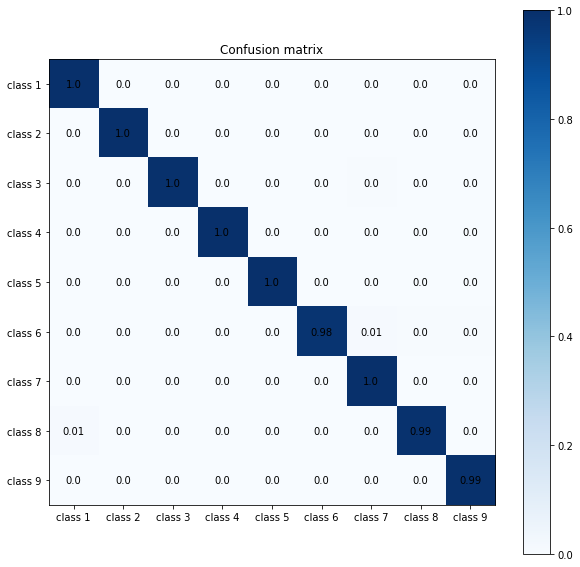

In [53]:
#xgboost na selektiranim značajkama
X_train, X_test, y_train, y_test = train_test_split( X, features['Class'], test_size=0.3, random_state=seed)
pred = xgboost_basic_cl(X_train, X_test, y_train)

y_test = [int(x-1) for x in y_test]
score_log = log_loss(y_test,pred[1],eps=1e-15)
score_acc = accuracy_score(y_test, pred[0])

print('Logloss:' + str(score_log))
print('Accuracy:' + str(score_acc))

make_and_plot_confusion_matrix(y_test,pred[0])

## Pokušaji rješavanja nebalasiranosti podataka

### dodavanje težina u XGboost

Logloss:0.016514342745579034
Accuracy:0.9950935295921497


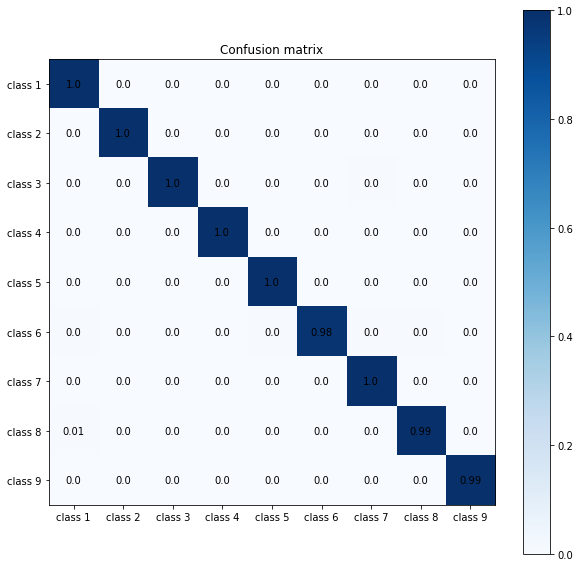

In [54]:
#xgboost sa dodanim težinama
X_train, X_test, y_train, y_test = train_test_split( X, features['Class'], test_size=0.3, random_state=seed)
pred = xgboost_weighted_cl(X_train, X_test, y_train)

y_test = [int(x-1) for x in y_test]
score_log = log_loss(y_test,pred[1],eps=1e-15)
score_acc = accuracy_score(y_test, pred[0])

print('Logloss:' + str(score_log))
print('Accuracy:' + str(score_acc))

make_and_plot_confusion_matrix(y_test,pred[0])

### oversampling

[(1, 2041), (2, 2041), (3, 2041), (4, 2041), (5, 2041), (6, 2041), (7, 2041), (8, 2041), (9, 2041)]
Logloss:0.01644777895396448
Accuracy:0.9944802207911684


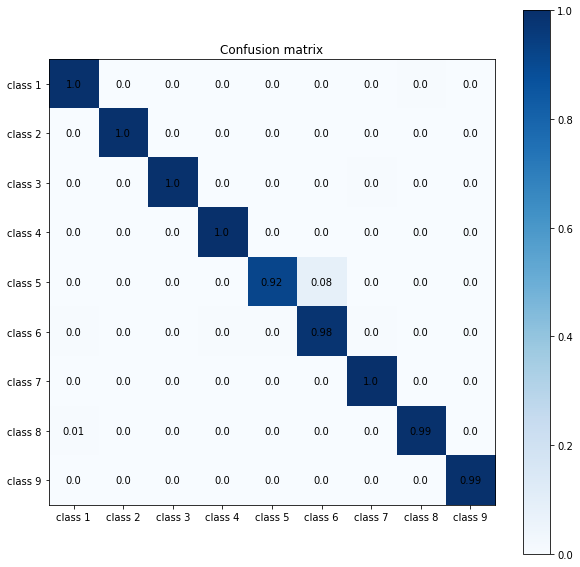

In [56]:
#RandomOverSampler
X_train, X_test, y_train, y_test = train_test_split( X, features['Class'], test_size=0.3, random_state=seed)
ros = RandomOverSampler(random_state=0)
X_train, y_train = ros.fit_resample(X_train, y_train)
print(sorted(Counter(y_train).items()))
pred = xgboost_basic_cl(X_train, X_test, y_train)

y_test = [int(x-1) for x in y_test]
score_log = log_loss(y_test,pred[1],eps=1e-15)
score_acc = accuracy_score(y_test, pred[0])

print('Logloss:' + str(score_log))
print('Accuracy:' + str(score_acc))

make_and_plot_confusion_matrix(y_test,pred[0])

[(1, 2041), (2, 2041), (3, 2041), (4, 2041), (5, 2041), (6, 2041), (7, 2041), (8, 2041), (9, 2041)]
Logloss:0.017321224962518502
Accuracy:0.9954001839926403


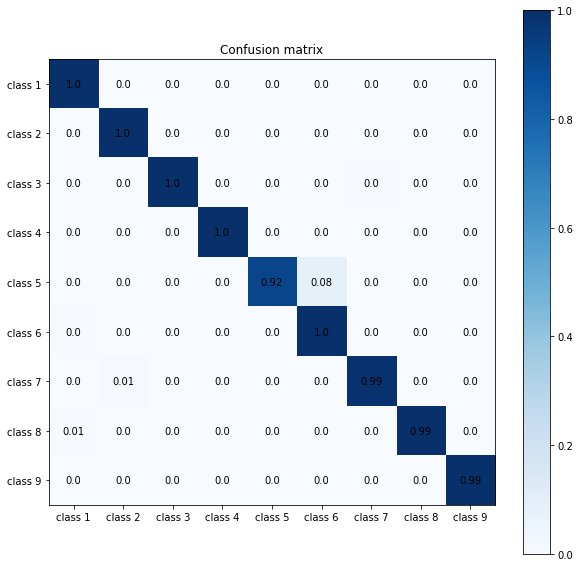

In [57]:
#SMOTE
X_train, X_test, y_train, y_test = train_test_split( X, features['Class'], test_size=0.3, random_state=seed)
X_train, y_train = SMOTE().fit_resample(X_train, y_train)
print(sorted(Counter(y_train).items()))

pred = xgboost_basic_cl(X_train, X_test, y_train)

y_test = [int(x-1) for x in y_test]
score_log = log_loss(y_test,pred[1],eps=1e-15)
score_acc = accuracy_score(y_test, pred[0])

print('Logloss:' + str(score_log))
print('Accuracy:' + str(score_acc))

make_and_plot_confusion_matrix(y_test,pred[0])


[(1, 2041), (2, 2041), (3, 2041), (4, 2041), (5, 2041), (6, 2041), (7, 2041), (8, 2041), (9, 2041)]
Logloss:0.0185378678315028
Accuracy:0.9941735663906777


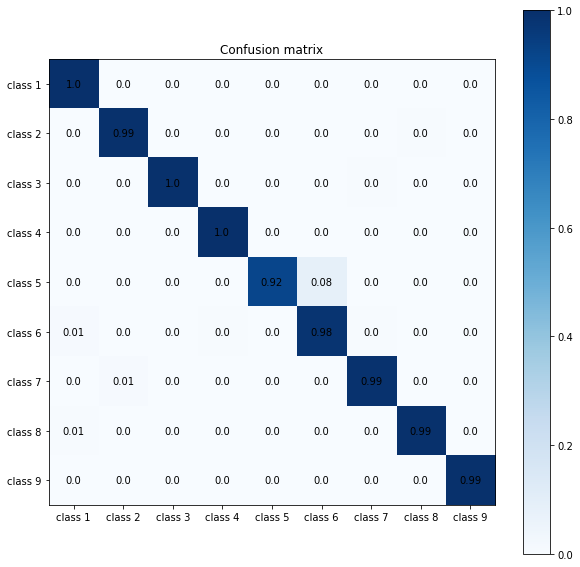

In [58]:
#SMOTE+težine
X_train, X_test, y_train, y_test = train_test_split( X, features['Class'], test_size=0.3, random_state=seed)
X_train, y_train = SMOTE().fit_resample(X_train, y_train)
print(sorted(Counter(y_train).items()))

pred = xgboost_weighted_cl(X_train, X_test, y_train)

y_test = [int(x-1) for x in y_test]
score_log = log_loss(y_test,pred[1],eps=1e-15)
score_acc = accuracy_score(y_test, pred[0])

print('Logloss:' + str(score_log))
print('Accuracy:' + str(score_acc))

make_and_plot_confusion_matrix(y_test,pred[0])

[(1, 2035), (2, 2059), (3, 2041), (4, 2040), (5, 2040), (6, 2042), (7, 2043), (8, 2050), (9, 2045)]
Logloss:0.01979448343379491
Accuracy:0.994786875191659


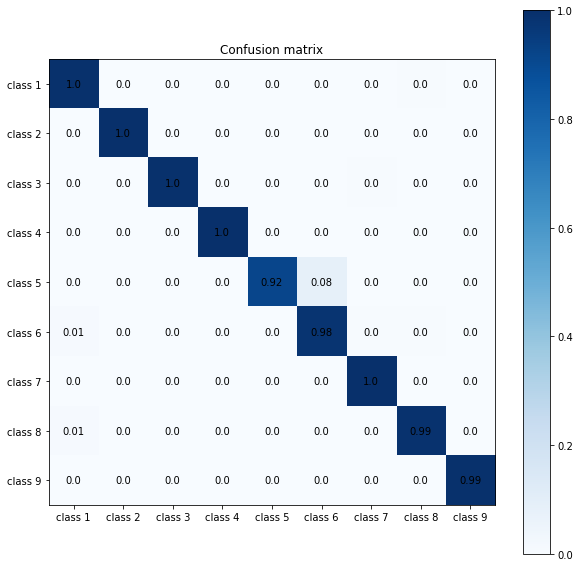

In [59]:
#ADASYN
X_train, X_test, y_train, y_test = train_test_split( X, features['Class'], test_size=0.3, random_state=seed)
X_train, y_train = ADASYN().fit_resample(X_train, y_train)
print(sorted(Counter(y_train).items()))

pred = xgboost_basic_cl(X_train, X_test, y_train)

y_test = [int(x-1) for x in y_test]
score_log = log_loss(y_test,pred[1],eps=1e-15)
score_acc = accuracy_score(y_test, pred[0])

print('Logloss:' + str(score_log))
print('Accuracy:' + str(score_acc))

make_and_plot_confusion_matrix(y_test,pred[0])

[(1, 2035), (2, 2059), (3, 2041), (4, 2040), (5, 2040), (6, 2042), (7, 2043), (8, 2050), (9, 2045)]
Logloss:0.020810325834023813
Accuracy:0.9944802207911684


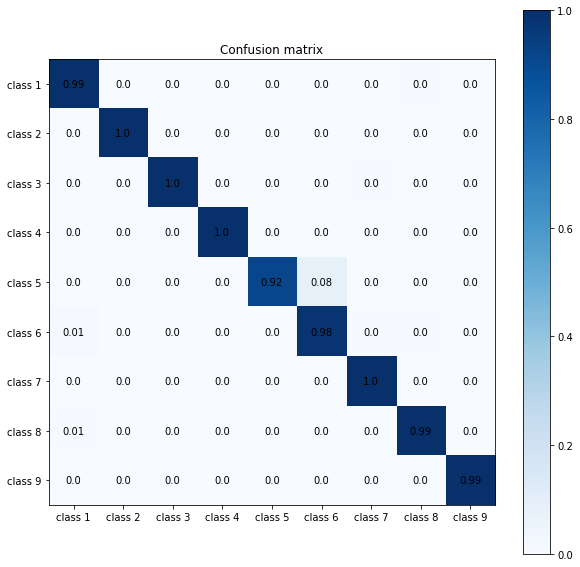

In [60]:
#ADASYN+težine
X_train, X_test, y_train, y_test = train_test_split( X, features['Class'], test_size=0.3, random_state=seed)
X_train, y_train = ADASYN().fit_resample(X_train, y_train)
print(sorted(Counter(y_train).items()))

pred = xgboost_weighted_cl(X_train, X_test, y_train)

y_test = [int(x-1) for x in y_test]
score_log = log_loss(y_test,pred[1],eps=1e-15)
score_acc = accuracy_score(y_test, pred[0])

print('Logloss:' + str(score_log))
print('Accuracy:' + str(score_acc))

make_and_plot_confusion_matrix(y_test,pred[0])

### undersample

[(1, 1063), (2, 1746), (3, 30), (4, 337), (5, 30), (6, 523), (7, 283), (8, 865), (9, 718)]
Logloss:0.02639847548154238
Accuracy:0.9911070223857712


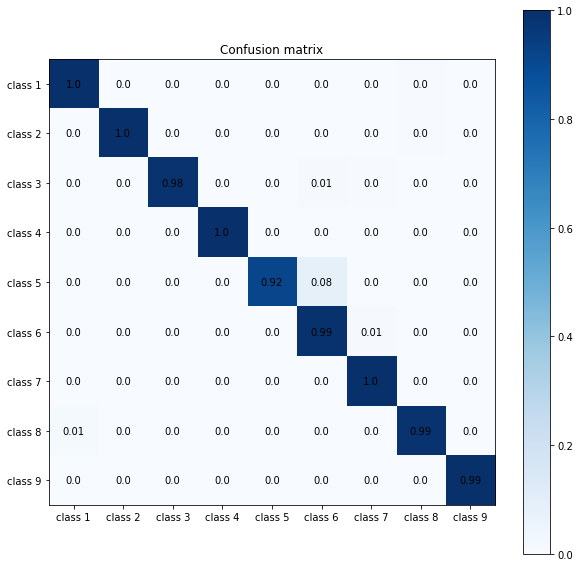

In [62]:
#RandomUnderSampler
X_train, X_test, y_train, y_test = train_test_split( X, features['Class'], test_size=0.3, random_state=seed)
undersample = RandomUnderSampler(sampling_strategy='majority')
X_train, y_train = undersample.fit_resample(X_train, y_train)
print(sorted(Counter(y_train).items()))

pred = xgboost_basic_cl(X_train, X_test, y_train)

y_test = [int(x-1) for x in y_test]
score_log = log_loss(y_test,pred[1],eps=1e-15)
score_acc = accuracy_score(y_test, pred[0])

print('Logloss:' + str(score_log))
print('Accuracy:' + str(score_acc))

make_and_plot_confusion_matrix(y_test,pred[0])

## bagging

Logloss:0.019146150081762035
Accuracy:0.9932536031892057


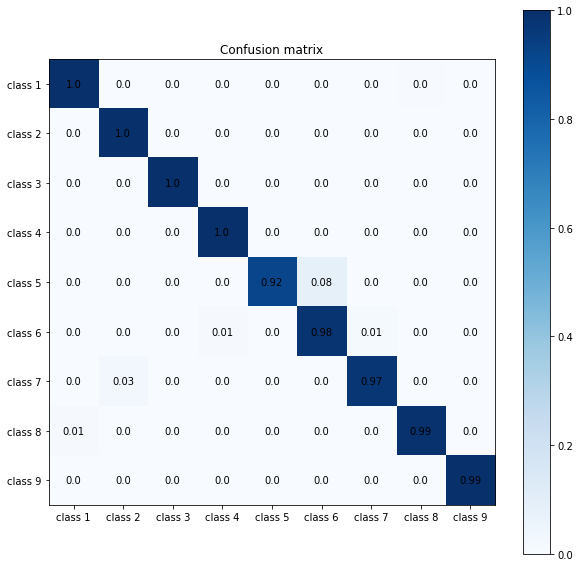

In [64]:
#BaggingClassifier iz sklearn-a, ali čini mi se da moramo koristit XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split( X, features['Class'], test_size=0.3, random_state=seed)

exgb_classifier = xgb.XGBClassifier()
exgb_classifier.set_params(**params)

y_train = [int(x-1) for x in y_train]
y_test = [int(x-1) for x in y_test]

model = BaggingClassifier(base_estimator=exgb_classifier, n_estimators=10, random_state=seed)
model.fit(X_train, y_train)

pred=model.predict(X_test)
pred_prob=model.predict_proba(X_test)

score_log = log_loss(y_test,pred_prob,eps=1e-15)
score_acc = accuracy_score(y_test, pred)

print('Logloss:' + str(score_log))
print('Accuracy:' + str(score_acc))

make_and_plot_confusion_matrix(y_test,pred)

### ručni kvazi-bagging

In [122]:
def bagging_custom(n_bags, test_index, train_index, train_X, test_X, train_y):
    
    bags = n_bags#broj bag-ova
    test_pred_prob = np.zeros((len(test_index),9))
    for bg in range(bags):
        #new_train_index je prvo samo izmješani train_index
        new_train_index = random.sample(list(train_index), int(len(train_index) * 1.))
        #dodajemo mi nasumične brojeve iz train_index (s ponavljanjem)
        for i in range(int(len(train_index) * 1.)):
            new_train_index.append(random.choice(train_index))

        train_X=X.iloc[new_train_index,:]
        train_y=y.iloc[new_train_index]

        exgb_classifier = xgb.XGBClassifier()
        exgb_classifier.set_params(**params)
        exgb_classifier.fit(train_X, train_y, eval_metric= 'mlogloss')   
        preds = exgb_classifier.predict_proba(test_X) 

        print("Bag " + str(bg+1))
        
        #zbrajamo vjerojatnosti od svih bag-ova
        test_pred_prob += preds
    #izračunamo prosječne vjerojatnosti pa onda klase
    pred_prob = test_pred_prob / bags
    best_preds = np.asarray([np.argmax(line) for line in pred_prob])
    return best_preds, pred_prob

### kfold

In [123]:
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 1000)

predicted = []
original = []
log_losses = []
accuracies = []
fold_counter = 0
misclassified_counter = 1
for train_index, test_index in kfold.split(X,y):
    fold_counter += 1
    train_X=X.iloc[train_index,:]
    train_y=y.iloc[train_index]
    test_X=X.iloc[test_index,:]
    test_y=y.iloc[test_index]
    #----------
    pred = bagging_custom(10, test_index, train_index, train_X, test_X, train_y) 
    #----------
    test_y = [int(x-1) for x in test_y]
    
    score_log = log_loss(test_y,pred[1],eps=1e-15)
    score_acc = accuracy_score(test_y, pred[0])

    log_losses.append(score_log)
    accuracies.append(score_acc)
    
    predicted.extend(pred[0])
    original.extend(test_y)
    
    print('-----------------------------------')
    print('FOLD '+ str(fold_counter))
    print('Logloss:' + str(score_log))
    print('Accuracy:' + str(score_acc))

    for i in range(len(pred[0])):
        if pred[0][i] != test_y[i]:
            print ('Missed! ' + 'actual='+str(test_y[i]+1) + ' predicted='+str(pred[0][i]+1))
            misclassified_counter += 1

predicted = np.array(predicted)
original = np.array(original)
print ('===========================================')
print('In total {} misclassified samples'.format(misclassified_counter-1))
print('Accuracy mean : ' + str(np.mean(accuracies)))
print('log loss mean : ' + str(np.mean(log_losses)))


Bag 1
Bag 2
Bag 3
Bag 4
Bag 5
Bag 6
Bag 7
Bag 8
Bag 9
Bag 10
-----------------------------------
FOLD 1
Logloss:0.010988666751496894
Accuracy:0.9954001839926403
Missed! actual=2 predicted=1
Missed! actual=3 predicted=9
Missed! actual=4 predicted=8
Missed! actual=5 predicted=8
Missed! actual=8 predicted=1
Missed! actual=8 predicted=7
Missed! actual=8 predicted=1
Missed! actual=8 predicted=4
Missed! actual=9 predicted=7
Missed! actual=9 predicted=1
Bag 1
Bag 2
Bag 3
Bag 4
Bag 5
Bag 6
Bag 7
Bag 8
Bag 9
Bag 10
-----------------------------------
FOLD 2
Logloss:0.014372354018684055
Accuracy:0.9967801287948482
Missed! actual=2 predicted=8
Missed! actual=2 predicted=8
Missed! actual=8 predicted=2
Missed! actual=8 predicted=1
Missed! actual=9 predicted=6
Missed! actual=9 predicted=6
Missed! actual=9 predicted=8
Bag 1
Bag 2
Bag 3
Bag 4
Bag 5
Bag 6
Bag 7
Bag 8


KeyboardInterrupt: 

# kraj

In [69]:
# load Id column of testset
md5hash_test = pd.read_csv("https://raw.githubusercontent.com/mateastanisic/lfs/master/md5hash_test.csv")
# drop first colum that was left -> fix this and save dataframe without that column
md5hash_test.drop(['Unnamed: 0'], axis=1, inplace=True)

In [75]:
selected_features_test = pd.read_csv('selected_features_rfc_test_cv2.csv')

In [112]:
X_test=selected_features_test.iloc[:,1:10873]
train_index=X.iloc[:,0]
test_index=selected_features_test.iloc[:,0]

pred = bagging_custom(10, test_index, train_index, X, X_test, y) 


Bag 1
Bag 2
Bag 3
Bag 4
Bag 5
Bag 6
Bag 7
Bag 8
Bag 9
Bag 10


# submission
bez headera

In [114]:
df = pd.DataFrame(pred[1])
result = pd.concat([md5hash_test, df], axis=1, sort=False)
result.to_csv('submisson.csv')

,0,1,2,3,4,5,6,7,8
0,0.000232,0.000235,0.000194,0.000189,0.996269,0.001132,0.000516,0.000890,0.000341
1,0.000069,0.000142,0.000056,0.000055,0.998794,0.000235,0.000281,0.000187,0.000183
2,0.000150,0.000196,0.000106,0.000145,0.998160,0.000257,0.000282,0.000514,0.000188
3,0.003723,0.006853,0.003120,0.004150,0.939744,0.015020,0.003415,0.019795,0.004180
4,0.000017,0.000014,0.999821,0.000015,0.000037,0.000026,0.000024,0.000024,0.000022
...,...,...,...,...,...,...,...,...,...
10868,0.000011,0.000009,0.999891,0.000010,0.000022,0.000015,0.000014,0.000014,0.000014
10869,0.000023,0.000138,0.000023,0.000043,0.000046,0.000046,0.999606,0.000048,0.000027
10870,0.000009,0.000009,0.999892,0.000010,0.000017,0.000016,0.000021,0.000011,0.000015
10871,0.000017,0.999795,0.000018,0.000011,0.000022,0.000019,0.000015,0.000031,0.000073


### stacking
vjv nepotrebno

>rfc 0.984 (0.002)
>etc 0.984 (0.002)
>xgb 0.976 (0.003)


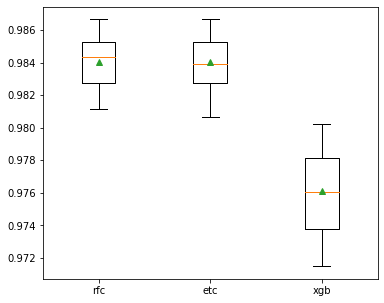

In [305]:
#prvo, evaluacija svakog modela kojeg ćemo koristiti u stackingu posebno

#lista modela
def get_models():
    models = dict()
    models['rfc'] = RandomForestClassifier(n_estimators=50, n_jobs=4)
    models['etc'] = ExtraTreesClassifier(n_estimators=50, n_jobs=4)
    models['xgb'] =xgb.XGBClassifier(**params)
    return models
 
# evaluacija modela s cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# boxplot točnosti
fig = plt.subplots(figsize=(6, 5))
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [247]:
# stacking
def get_stacking():
    # level0 je base models
    level0 = list()
    level0.append(('rfc', RandomForestClassifier(n_estimators=50, n_jobs=4)))
    level0.append(('etc', ExtraTreesClassifier(n_estimators=50, n_jobs=4)))
    level0.append(('xgb', xgb.XGBClassifier(**params)))
    # level1 je learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
    return model

X_train, X_test, y_train, y_test = train_test_split( X, features['Class'], test_size=0.3, random_state=47)
y_train = [int(x-1) for x in y_train]
y_test = [int(x-1) for x in y_test]

model=get_stacking()
model.fit(X_train, y_train)

pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)
score_log = log_loss(y_test,pred_proba,eps=1e-15)
score_acc = accuracy_score(y_test, pred)

print('Logloss:' + str(score_log))
print('Accuracy:' + str(score_acc))
make_and_plot_confusion_matrix(y_test,pred)

KeyboardInterrupt: 

### cross-validation za xgboost koristeći xgb.cv

In [199]:
#cross-validation s xgboost-om koristeći xgb.cv
X_train, X_test, y_train, y_test = train_test_split( X, features['Class'], test_size=0.3, random_state=47)
num_round = 50  
y_train = [int(x-1) for x in y_train]
dtrain = xgb.DMatrix(X_train, label=y_train)

res = xgb.cv(param, dtrain, num_round, nfold=5, early_stopping_rounds=10, show_stdv=True)

best_nrounds = res.shape[0] - 1
cv_mean = res.iloc[-1, 0]
cv_std = res.iloc[-1, 1]

print('mean %.3f scores %.3f' % (cv_mean, cv_std))

<br>
<br>
<br>
.........fails..........

In [58]:
#ručno računanje težina (jer mi nešto nije funkcioniralo)
#wj=ukupan_broj_primjera/(broj_primjera_u_klasi*broj_klasa)
#prvo izračunamo težine klasa, a onda ih pridružimo svakom primjeru
#tj. u sample data se nalaze težine svakog primjera iz y_train
def create_weights(y_train, largest_class_weight_coef):
    classes = np.unique(y_train, axis = 0)
    classes.sort()
    class_samples = np.bincount(y_train)
    total_samples = class_samples.sum()
    n_classes = len(class_samples)
    weights = total_samples / (n_classes * class_samples * 1.0)
    class_weight_dict = {key : value for (key, value) in zip(classes, weights)}
    sample_weights = [class_weight_dict[y] for y in y_train]
    return sample_weights